# Resultados y visualizaciones de los meta-modelos

otra vez, hay que usar el entorno de quantstats

In [1]:
import sys
import os
import pandas as pd

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import quantstats as qs
import numpy as np


### Funciones auxiliares

In [2]:

# Función para calcular Beta manualmente
def calculate_beta(strategy_returns: pd.Series, benchmark_returns: pd.Series):
    covariance_matrix = np.cov(strategy_returns, benchmark_returns)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return beta

# Función para calcular Alpha manualmente
def calculate_alpha(strategy_returns: pd.Series, benchmark_returns: pd.Series, rf_rate: float = 0.0):
    beta = calculate_beta(strategy_returns, benchmark_returns)
    excess_strategy_returns = strategy_returns.mean() - rf_rate
    excess_benchmark_returns = benchmark_returns.mean() - rf_rate
    alpha = excess_strategy_returns - beta * excess_benchmark_returns
    return alpha * 252  # Annualizar el alpha

# Función para calcular las estadísticas
def calculate_statistics(returns: pd.Series, benchmark: pd.Series):
    stats = {
        'Cumulative Returns': qs.stats.compsum(returns).iloc[-1],
        'Annualized Return': qs.stats.cagr(returns),
        #'Volatility': qs.stats.volatility(returns),
        'Sharpe Ratio': qs.stats.sharpe(returns),
        'Sortino Ratio': qs.stats.sortino(returns),
        'Maximum Drawdown': qs.stats.max_drawdown(returns)*1000,
        'Calmar Ratio': qs.stats.calmar(returns),
        'Value at Risk (VaR)': qs.stats.var(returns),
        'Alpha': calculate_alpha(returns, benchmark),
        'Beta': calculate_beta(returns, benchmark)
    }
    return stats


def calculate_cumm_returns(returns):
    return (1 + returns).cumprod() - 1


# Resultados SPY

In [3]:
SPY_ORIG_META_RETURNS = pd.read_parquet(r'meta_model_spy_original_results.parquet')
SPY_VOLUME_META_RETURNS = pd.read_parquet(r'meta_model_spy_volume_results.parquet')
SPY_DOLLAR_META_RETURNS = pd.read_parquet(r'meta_model_spy_dollar_results.parquet')

SPY_ORIG_META_RETURNS.set_index('date', inplace = True)
SPY_VOLUME_META_RETURNS.set_index('date', inplace = True)
SPY_DOLLAR_META_RETURNS.set_index('date', inplace = True)

In [4]:
spy_orig_meta_returns_buy_and_hold = SPY_ORIG_META_RETURNS['buy_and_hold']
spy_orig_meta_returns_filtered = SPY_ORIG_META_RETURNS['filtered_returns']
spy_orig_meta_returns_predicted = SPY_ORIG_META_RETURNS['predicted_returns']

spy_orig_meta_returns_buy_and_hold_stats = calculate_statistics(SPY_ORIG_META_RETURNS['buy_and_hold'], SPY_ORIG_META_RETURNS['buy_and_hold'])
spy_orig_meta_returns_filtered_stats = calculate_statistics(SPY_ORIG_META_RETURNS['filtered_returns'], SPY_ORIG_META_RETURNS['buy_and_hold'])
spy_orig_meta_returns_predicted_stats = calculate_statistics(SPY_ORIG_META_RETURNS['predicted_returns'], SPY_ORIG_META_RETURNS['buy_and_hold'])

spy_volume_meta_returns_filtered_stats = calculate_statistics(SPY_VOLUME_META_RETURNS['filtered_returns'], SPY_VOLUME_META_RETURNS['buy_and_hold'])
spy_volume_meta_returns_predicted_stats = calculate_statistics(SPY_VOLUME_META_RETURNS['predicted_returns'], SPY_VOLUME_META_RETURNS['buy_and_hold'])

spy_dollar_meta_returns_filtered_stats = calculate_statistics(SPY_DOLLAR_META_RETURNS['filtered_returns'], SPY_DOLLAR_META_RETURNS['buy_and_hold'])
spy_dollar_meta_returns_predicted_stats = calculate_statistics(SPY_DOLLAR_META_RETURNS['predicted_returns'], SPY_DOLLAR_META_RETURNS['buy_and_hold'])

NameError: name 'qs' is not defined

In [ ]:
stats_df = pd.DataFrame({
    'Benchmark (S&P 500)': spy_orig_meta_returns_buy_and_hold_stats,
    'PPO Original Bars': spy_orig_meta_returns_predicted_stats,
    'PPO + Meta-labeling Original Bars': spy_orig_meta_returns_filtered_stats,
    'PPO Volume Bars': spy_volume_meta_returns_predicted_stats,
    'PPO + Meta-labeling Volume Bars': spy_volume_meta_returns_filtered_stats,
    'PPO Dollar Bars': spy_dollar_meta_returns_predicted_stats,
    'PPO + Meta-labeling Dollar Bars': spy_dollar_meta_returns_filtered_stats,
})
stats_df = stats_df.T
stats_df = stats_df.applymap(lambda x: round(x, 3))
stats_df

,Cumulative Returns,Annualized Return,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,Calmar Ratio,Value at Risk (VaR),Alpha,Beta
Benchmark (S&P 500),0.146,0.216,0.133,0.191,-58.220,3.705,-0.001,0.000,1.000
PPO Original Bars,0.063,0.092,0.076,0.106,-60.685,1.513,-0.000,-0.000,0.633
PPO + Meta-labeling Original Bars,0.239,0.359,0.217,0.315,-41.652,8.627,-0.001,0.000,0.909
PPO Volume Bars,0.100,0.147,0.562,0.795,-32.814,4.466,-0.001,0.003,0.380
PPO + Meta-labeling Volume Bars,0.148,0.218,0.625,0.887,-28.547,7.630,-0.002,0.004,0.640
PPO Dollar Bars,0.079,0.114,0.222,0.304,-34.464,3.321,-0.001,-0.000,0.653
PPO + Meta-labeling Dollar Bars,0.242,0.364,0.559,0.798,-32.436,11.207,-0.001,0.003,0.821


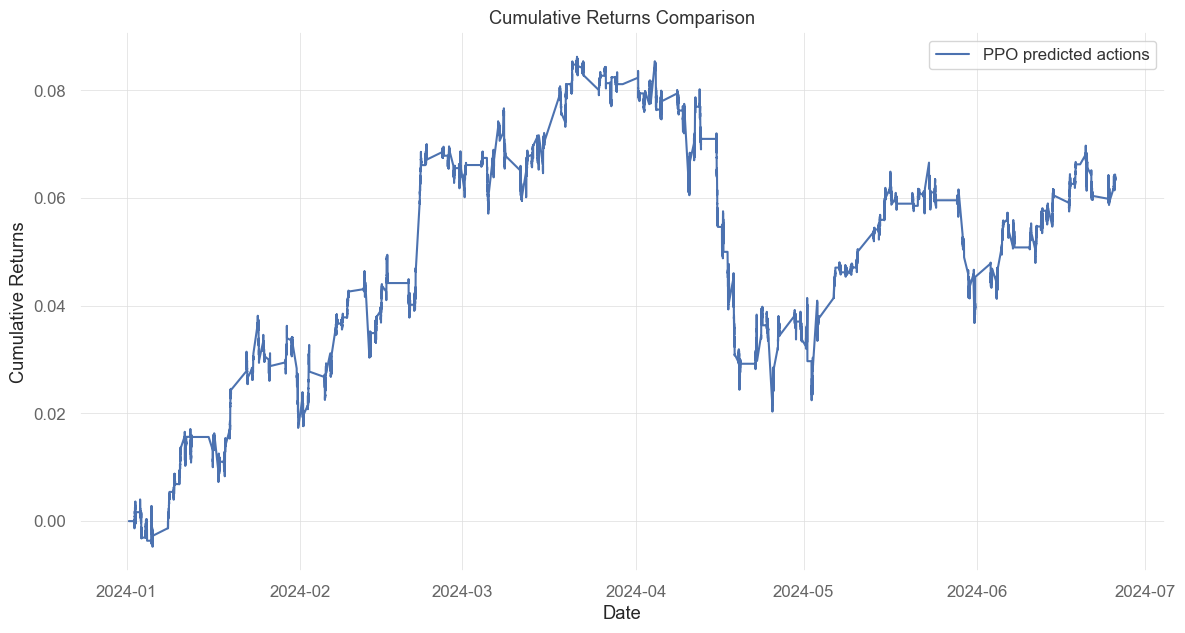

In [ ]:
# Crear figura
plt.figure(figsize=(14, 7))

# # Calcular el "cumulative returns" de las estrategias y del benchmark
# cumulative_filtered_returns = (1 + filtered_returns).cumprod() - 1
# cumulative_predicted_returns = (1 + predicted_returns).cumprod() - 1
# cumulative_buy_and_hold = (1 + buy_and_hold).cumprod() - 1

# Graficar
plt.plot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['predicted_returns']), label='PPO predicted actions')
# plt.plot(cumulative_filtered_returns, label='Meta-model filtered actions')
# plt.plot(cumulative_buy_and_hold, label='Buy&Hold')

# Agregar etiquetas y título
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

# Mostrar el gráfico
plt.show()

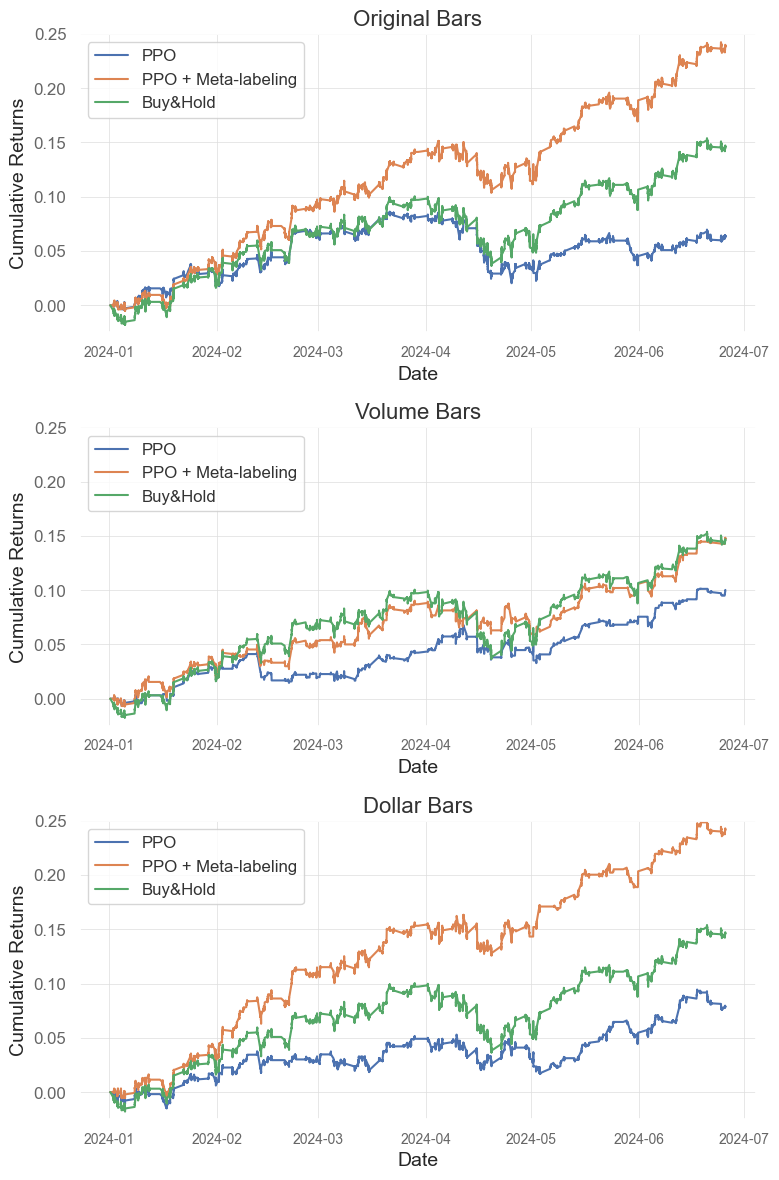

In [ ]:


filename = 'final_spy_strategy_comparison_vertical'
# plots en vertical
plt.figure(figsize=(8, 12))

# Plot 1: Original Bars
plt.subplot(3, 1, 1)
plt.plot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['predicted_returns']), label='PPO')
plt.plot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling')
plt.plot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['buy_and_hold']), label='Buy&Hold')
plt.title('Original Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 2: Volume Bars
plt.subplot(3, 1, 2)
plt.plot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['predicted_returns']), label='PPO')
plt.plot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling')
plt.plot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['buy_and_hold']), label='Buy&Hold')
plt.title('Volume Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 3: Dollar Bars
plt.subplot(3, 1, 3)
plt.plot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['predicted_returns']), label='PPO')
plt.plot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling')
plt.plot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['buy_and_hold']), label='Buy&Hold')
plt.title('Dollar Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')

plt.show()

NameError: name 'sns' is not defined

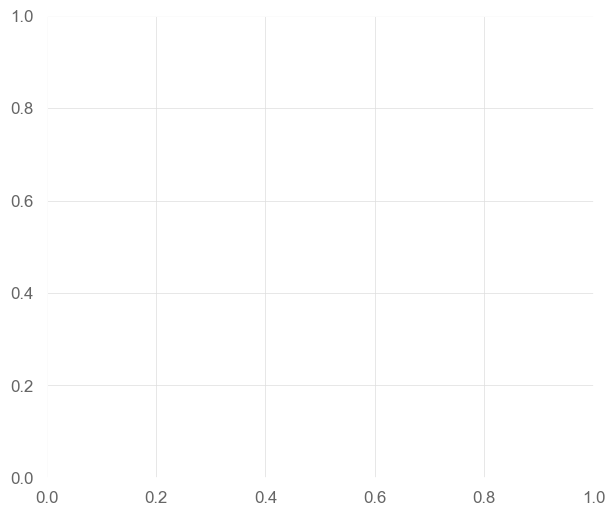

In [ ]:
filename = 'final_spy_strategy_comparison_horizontal'
# plots en horizontal
plt.figure(figsize=(24, 6))

# Plot 1: Original Bars
plt.subplot(1, 3, 1)
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Original Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 2: Volume Bars
plt.subplot(1, 3, 2)
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Volume Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

# Plot 3: Dollar Bars
plt.subplot(1, 3, 3)
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Dollar Bars', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(fontsize=10)
plt.ylim(-0.025, 0.25)  # Establecer límites en el eje Y
plt.legend(loc='upper left')  # Colocar la leyenda a la izquierda

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')

plt.show()

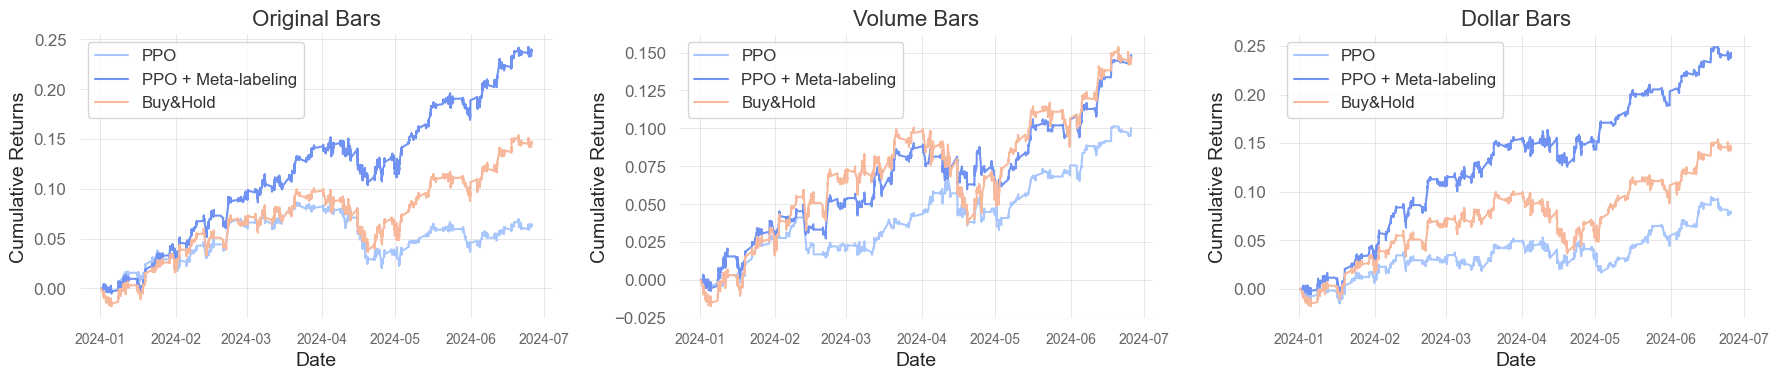

In [ ]:
# Horizontal plots
plt.figure(figsize=(18, 4))

# Plot 1
plt.subplot(1, 3, 1)
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_ORIG_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Original Bars', fontsize=16)  # Ajustar el tamaño del título
plt.xlabel('Date', fontsize=14)  # Cambiar el texto del eje X
plt.ylabel('Cumulative Returns', fontsize=14)  # Cambiar el texto del eje Y
plt.xticks(fontsize=10)  # Ajustar el tamaño de los xticks
plt.legend()

# Plot 2
plt.subplot(1, 3, 2)
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_VOLUME_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Volume Bars', fontsize=16)  # Ajustar el tamaño del título
plt.xlabel('Date', fontsize=14)  # Cambiar el texto del eje X
plt.ylabel('Cumulative Returns', fontsize=14)  # Cambiar el texto del eje Y
plt.xticks(fontsize=10)  # Ajustar el tamaño de los xticks
plt.legend()

# Plot 3
plt.subplot(1, 3, 3)
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['predicted_returns']), label='PPO', color=palette[0])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['filtered_returns']), label='PPO + Meta-labeling', color=palette[1])
sns.lineplot(calculate_cumm_returns(SPY_DOLLAR_META_RETURNS['buy_and_hold']), label='Buy&Hold', color=palette[2])
plt.title('Dollar Bars', fontsize=16)  # Ajustar el tamaño del título
plt.xlabel('Date', fontsize=14)  # Cambiar el texto del eje X
plt.ylabel('Cumulative Returns', fontsize=14)  # Cambiar el texto del eje Y
plt.xticks(fontsize=10)  # Ajustar el tamaño de los xticks
plt.legend()

plt.tight_layout()
plt.show()

# Resultados BTC